In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 8.53.54 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/Screen Shot 2018-06-12 at 9.27.26 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/rotated_by_45_Screen Shot 2018-06-12 at 8.58.13 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.47.41 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.56.30 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 9.11.17 PM.png
/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/test/rottenbanana/vertical_flip_Screen Shot 2018-06-12 at 9.19.08

In [3]:
## Importing Required Libraries
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.applications import MobileNetV2,InceptionResNetV2,VGG16
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [5]:
## Data Augmentation
train_datagen=ImageDataGenerator(rescale=1/255.0,zoom_range=0.2,shear_range=0.3,horizontal_flip=True,brightness_range=[0.5,1.5])
test_datagen=ImageDataGenerator(rescale=1/255.0)
val_datagen=ImageDataGenerator(rescale=1/255.0)

In [6]:
BATCH_SIZE=32
IMG_SHAPE=(224,224)

In [14]:

train_data=train_datagen.flow_from_directory("../input/fruits-fresh-and-rotten-for-classification/dataset/test",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")

test_data=train_datagen.flow_from_directory("../input/fruits-fresh-and-rotten-for-classification/dataset/train",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")
val_data=train_datagen.flow_from_directory("../input/fruits-fresh-and-rotten-for-classification/dataset/test",
                                            target_size=IMG_SHAPE,batch_size=BATCH_SIZE,class_mode="binary")

Found 2698 images belonging to 6 classes.
Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [15]:
train_data.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [19]:
image_class_dict={0:'freshapples',
 1:'freshbanana',
 2:'freshoranges',
 3:'rottenapples',
 4:'rottenbanana',
 5:'rottenoranges'}

In [26]:
### Ploting Augmented Images
def plot_random_images():
    images,labels=train_data.next()
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(image_class_dict[labels[i]])
        

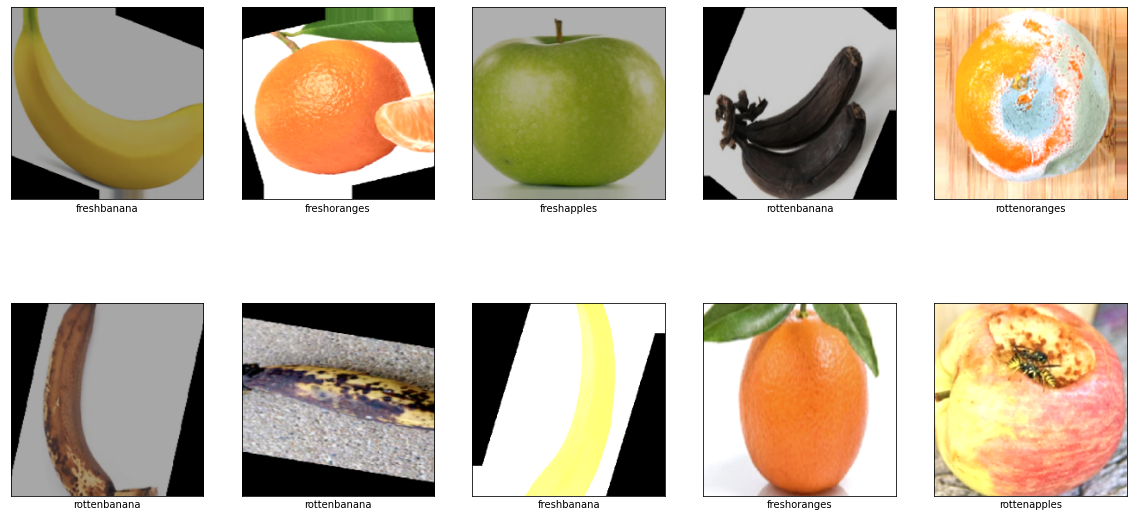

In [27]:
plot_random_images()

In [28]:
cnn_model=tf.keras.models.Sequential([
    Conv2D(16,3,activation="relu",input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,3,activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(64,3,activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [29]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [31]:
cnn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [32]:
history = cnn_model.fit_generator(train_data,validation_data=(val_data),epochs=10,steps_per_epoch=18,validation_steps=9)

Epoch 1/10
18/18 [==============================] - 35s 2s/step - loss: -692.0889 - accuracy: 0.1273 - val_loss: -13477.6846 - val_accuracy: 0.1389
Epoch 2/10
18/18 [==============================] - 31s 2s/step - loss: -61605.3444 - accuracy: 0.1329 - val_loss: -537766.3125 - val_accuracy: 0.1042
Epoch 3/10
18/18 [==============================] - 30s 2s/step - loss: -1028195.7599 - accuracy: 0.1708 - val_loss: -5753911.5000 - val_accuracy: 0.1354
Epoch 4/10
18/18 [==============================] - 29s 2s/step - loss: -9550459.2632 - accuracy: 0.1600 - val_loss: -32448616.0000 - val_accuracy: 0.1424
Epoch 5/10
18/18 [==============================] - 29s 2s/step - loss: -47286738.3158 - accuracy: 0.1588 - val_loss: -125957376.0000 - val_accuracy: 0.1181
Epoch 6/10
18/18 [==============================] - 28s 2s/step - loss: -192057515.3684 - accuracy: 0.1274 - val_loss: -443373696.0000 - val_accuracy: 0.1597
Epoch 7/10
18/18 [==============================] - 28s 2s/step - loss: -6118

In [33]:
cnn_model.evaluate(test_data)

341/341 [==============================] - 343s 1s/step - loss: -12094662656.0000 - accuracy: 0.1450


[-12094662656.0, 0.14503256976604462]

Text(0.5, 0, 'Epochs')

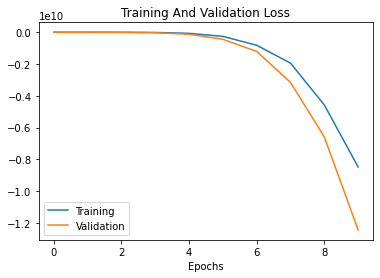

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [35]:
from keras.preprocessing import image
test_image = image.load_img("../input/fruits-fresh-and-rotten-for-classification/dataset/test/freshoranges/Screen Shot 2018-06-12 at 11.50.41 PM.png", target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

[1.]


In [36]:
from keras.preprocessing import image
test_image = image.load_img('../input/fruits-fresh-and-rotten-for-classification/dataset/test/rottenoranges/Screen Shot 2018-06-12 at 11.18.34 PM.png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

[1.]


In [37]:
from keras.preprocessing import image
test_image = image.load_img('../input/fruits-fresh-and-rotten-for-classification/dataset/test/rottenoranges/Screen Shot 2018-06-12 at 11.22.32 PM.png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

[1.]
